# Libraries Import

In [1]:
# IMPORTED Libraries for this prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set Import

In [2]:
HouseP = pd.read_csv("Housing.csv")
HouseP.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
HouseP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
HouseP.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
HouseP.shape

(545, 13)

# Data Encoding

In [6]:
HouseP['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [7]:
HouseP.replace({'mainroad':{'yes': 0, 'no':1}},inplace=True)

In [8]:
HouseP['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [9]:
HouseP.replace({'guestroom':{'yes': 0, 'no':1}},inplace=True)

In [10]:
HouseP.replace({'basement':{'yes': 0, 'no':1}},inplace=True)

In [11]:
HouseP.replace({'hotwaterheating':{'yes': 0, 'no':1}},inplace=True)

In [12]:
HouseP.replace({'airconditioning':{'yes': 0, 'no':1}},inplace=True)

In [13]:
HouseP['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [14]:
HouseP.replace({'furnishingstatus':{'semi-furnished': 0, 'unfurnished':1, 'furnished':2}},inplace=True)

# Defining X and Y

In [15]:
# Defining Target and Features
y = HouseP['price']
X = HouseP[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking','furnishingstatus']]

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

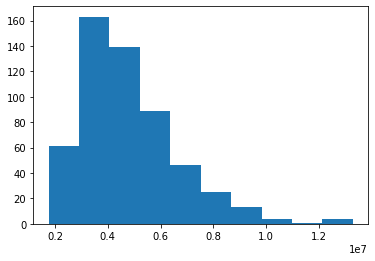

In [16]:
plt.hist(y)

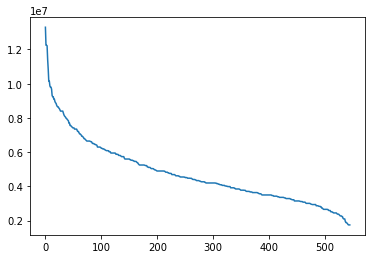

In [17]:
plt.plot(y)

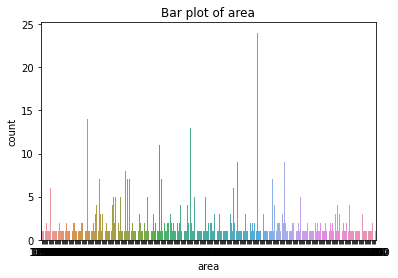

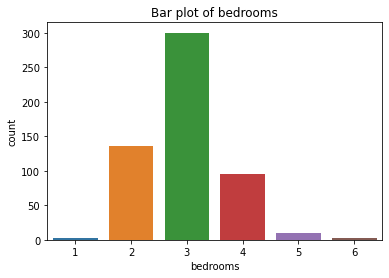

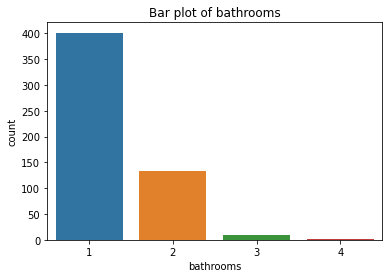

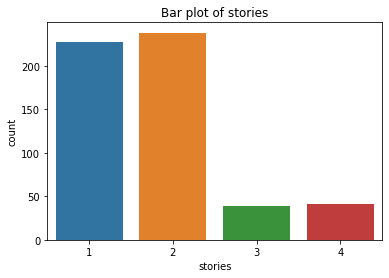

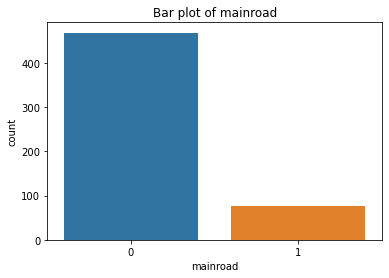

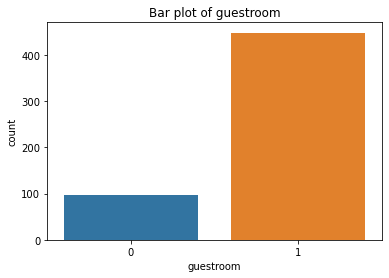

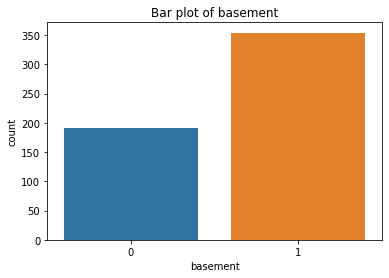

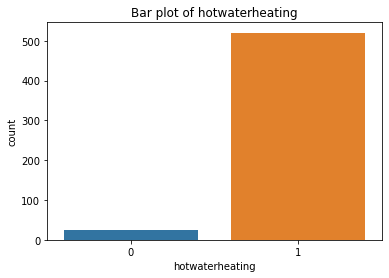

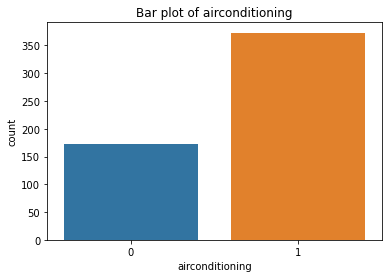

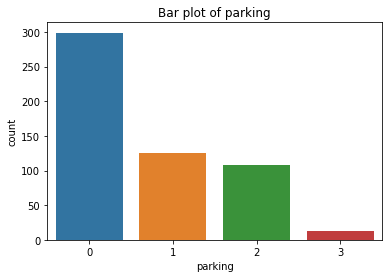

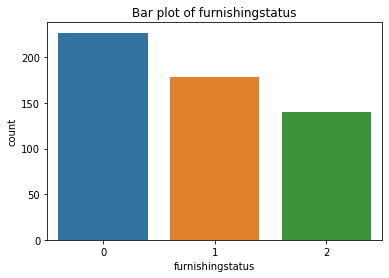

In [18]:
for i in X:
    sns.countplot(data=HouseP,x=i)
    plt.title(f'Bar plot of {i}')
    plt.show()

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state= 2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 11), (164, 11), (381,), (164,))

# Model Selection

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


# Model Fitting

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
model.intercept_

2645084.16708111

In [23]:
model.coef_

array([ 2.54678616e+02,  1.39430147e+05,  1.04182043e+06,  4.29143400e+05,
       -5.22162483e+05, -4.26429029e+05, -3.43077395e+05, -7.76471653e+05,
       -9.06330461e+05,  2.77421757e+05,  7.16099292e+04])

# Prediction

In [24]:
y_pred = model.predict(X_test)
y_pred

array([4800080.06135488, 3332013.86593601, 5592479.00313939,
       5476539.69101646, 2664613.62768333, 4524617.00201707,
       5699891.20145363, 5087258.70275459, 3106303.09233193,
       2932956.39223758, 7231236.81895795, 4608818.7728786 ,
       5231147.87250552, 3435956.59062997, 2828881.33499571,
       3834238.63971498, 7468025.26736036, 5722249.13150116,
       4545433.03517917, 7615189.10827853, 3975235.02369478,
       7201330.23653159, 8180442.59690398, 3301843.65305221,
       7692753.32898891, 5080265.57003687, 4097477.90013374,
       6628513.82605336, 3865845.20148118, 3949358.80985779,
       3367428.1041405 , 5784916.20989123, 7820402.25822686,
       7557473.74576294, 3035074.19833013, 3977605.66647824,
       3992320.93107822, 6987513.65223274, 6613384.38507022,
       3845023.51775106, 3696712.18708136, 5591017.52930095,
       3278998.85753504, 3799708.19174493, 3091505.99307602,
       4881191.85311763, 4021239.55655967, 6435511.6382551 ,
       3254885.51860896,

# Accurarcy

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


936000.8919871938